# Test 4 technologies to validate the use/construction separation method

In [1]:
import pandas as pd
import numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt

In [2]:
from func import *

In [3]:
# Results from ecos_sep_constr_use
R_long_tot_constr = pd.read_csv(r"C:\Users\matth\PycharmProjects\energyscope_moo\02_LCA\results\R_long_tot_constr.csv")
R_long_tot_use = pd.read_csv(r"C:\Users\matth\PycharmProjects\energyscope_moo\02_LCA\results\R_long_tot_use.csv")

In [17]:
# Results from brightway
pv_midpoints_bw = pd.read_csv("AB_results/PV_LCIA-results.csv")
wind_midpoints_bw = pd.read_csv("AB_results/ES_sep_wind_LCIA-results.csv")
wind_endpoints_bw = pd.read_csv("AB_results/ES_sep_wind_endpoints_LCIA-results.csv")

In [5]:
midpoint_categories, endpoint_categories_HH, endpoint_categories_EQ = impact_categories(R_constr=R_long_tot_constr, R_use=R_long_tot_use)

## PV

Ecoinvent units:
- construction: [/unit] (units of 3 kW)
- use : [/kWh]

ES units:
- construction: [/GW]
- use: [/GWh]

Capacity factor: 3e(-6) (construction)
Conversion factor: 1e(-6) (use)

### Midpoints

In [22]:
for impact in midpoint_categories:
    print(impact_computation(tech="PV", impact=impact, conversion_factor=0.000001, capacity_factor=0.000003, use_value=1e6, indicator="midpoint", format="clean", R_constr=R_long_tot_constr, R_use=R_long_tot_use, no_use_phase=True))

Climate change, long term: 6.2408e+03 kg CO2 eq (long)
Climate change, short term: 6.6388e+03 kg CO2 eq (short)
Fossil and nuclear energy use: 8.9217e+04 MJ deprived
Freshwater acidification: 3.7005e+01 kg SO2 eq
Freshwater ecotoxicity: 3.1643e+06 CTUe
Freshwater eutrophication: 4.6138e-01 kg PO4 P-lim eq
Human toxicity cancer: 2.8431e-04 CTUh
Human toxicity non-cancer: 3.6460e-03 CTUh
Ionizing radiations: 7.4133e+04 Bq C-14 eq
Land occupation, biodiversity: 1.9334e+02 m2 arable land eq .yr
Land transformation, biodiversity: 2.1313e+00 m2 arable land eq
Marine eutrophication: 1.8218e+00 kg N N-lim eq
Mineral resources use: 1.6906e+02 kg deprived
Ozone layer depletion: 8.4340e-04 kg  CFC-11 eq
Particulate matter formation: 4.5505e+00 kg PM2.5 eq
Photochemical oxidant formation: 2.7868e+01 kg NMVOC eq
Terrestrial acidification: 3.8592e+01 kg SO2 eq
Water scarcity: 9.3511e+03 m3 world-eq


In [25]:
comparison_pv_midpoints = comparison(tech="PV", conversion_factor=0.000001, capacity_factor=0.000003, use_value=1e6, indicator="midpoint", df_bw_mid=pv_midpoints_bw, df_bw_end=None, R_constr=R_long_tot_constr, R_use=R_long_tot_use, no_use_phase=True)

In [26]:
display(comparison_pv_midpoints)

,es_moo,brightway,rel_error
"Climate change, long term",6.240800e+03,6.240800e+03,-5.064243e-09
"Climate change, short term",6.638821e+03,6.638821e+03,-5.804652e-09
Fossil and nuclear energy use,8.921742e+04,8.921742e+04,-4.227288e-09
Freshwater acidification,3.700511e+01,3.700511e+01,-3.537553e-08
Freshwater ecotoxicity,3.164316e+06,3.164316e+06,-4.116659e-08
Freshwater eutrophication,4.613811e-01,4.613811e-01,-3.359671e-09
Human toxicity cancer,2.843092e-04,2.843092e-04,-2.198034e-08
Human toxicity non-cancer,3.646007e-03,3.646007e-03,-5.775970e-08
Ionizing radiations,7.413260e+04,7.413260e+04,7.518162e-09
"Land occupation, biodiversity",1.933359e+02,1.933359e+02,-1.224393e-08


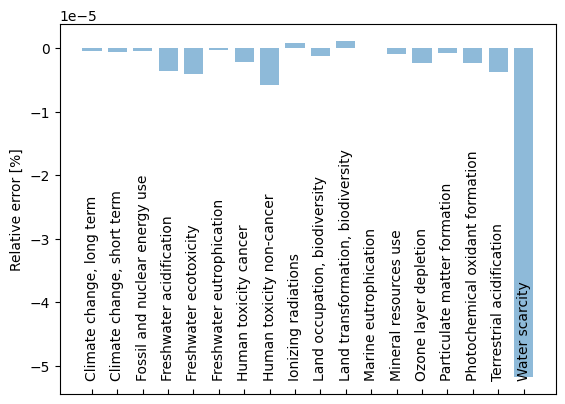

In [27]:
plot_comparison(comparison_pv_midpoints, save=False)

The test for PV, which verifies whether the construction impacts are reproduced correctly. These results are in line with the test in "test_basics.ipynb" (for which the matrix was not extended).

## WIND

Ecoinvent units:
- construction: [/unit] (units of 2 MW)
- use : [/kWh]

ES units:
- construction: [/GW]
- use: [/GWh]

Capacity factor: 2e(-3) (construction)
Conversion factor: 1e(-6) (use)

Energy use example: 1 GWh

In [28]:
for impact in midpoint_categories:
    print(impact_computation(tech="WIND", impact=impact, conversion_factor=0.000001, capacity_factor=0.002, use_value=1e6, indicator="midpoint", format="clean", R_constr=R_long_tot_constr, R_use=R_long_tot_use, no_use_phase=False))

Climate change, long term: 1.1520e+06 kg CO2 eq (long)
Climate change, short term: 1.2292e+06 kg CO2 eq (short)
Fossil and nuclear energy use: 1.6585e+07 MJ deprived
Freshwater acidification: 5.0295e+03 kg SO2 eq
Freshwater ecotoxicity: 4.4669e+08 CTUe
Freshwater eutrophication: 6.9340e+01 kg PO4 P-lim eq
Human toxicity cancer: 2.9272e-01 CTUh
Human toxicity non-cancer: 4.0310e-01 CTUh
Ionizing radiations: 9.0565e+06 Bq C-14 eq
Land occupation, biodiversity: 7.1075e+04 m2 arable land eq .yr
Land transformation, biodiversity: 7.3787e+02 m2 arable land eq
Marine eutrophication: 3.0770e+02 kg N N-lim eq
Mineral resources use: 2.3914e+05 kg deprived
Ozone layer depletion: 9.7358e-02 kg  CFC-11 eq
Particulate matter formation: 7.8631e+02 kg PM2.5 eq
Photochemical oxidant formation: 5.6170e+03 kg NMVOC eq
Terrestrial acidification: 5.2886e+03 kg SO2 eq
Water scarcity: 5.8809e+05 m3 world-eq


In [29]:
for impact in endpoint_categories_EQ:
    print(impact_computation(tech="WIND", impact=impact, conversion_factor=0.000001, capacity_factor=0.002, use_value=1e6, indicator="endpoint", format="clean", R_constr=R_long_tot_constr, R_use=R_long_tot_use, no_use_phase=False))

Climate change, ecosystem quality, long term: 6.9613e+05 PDF.m2.yr
Climate change, ecosystem quality, short term: 2.1749e+05 PDF.m2.yr
Freshwater acidification: 1.1581e+04 PDF.m2.yr
Freshwater ecotoxicity, long term: 2.0676e+05 PDF.m2.yr
Freshwater ecotoxicity, short term: 4.2306e+04 PDF.m2.yr
Freshwater eutrophication: 2.5123e+02 PDF.m2.yr
Ionizing radiation, ecosystem quality: 1.6864e-04 PDF.m2.yr
Land occupation, biodiversity: 4.6775e+04 PDF.m2.yr
Land transformation, biodiversity: 1.1744e+05 PDF.m2.yr
Marine acidification, long term: 1.6710e+05 PDF.m2.yr
Marine acidification, short term: 1.8158e+04 PDF.m2.yr
Marine eutrophication: 2.6923e+03 PDF.m2.yr
Terrestrial acidification: 7.5866e+04 PDF.m2.yr
Thermally polluted water: 1.9614e+00 PDF.m2.yr
Water availability, freshwater ecosystem: 4.1923e+00 PDF.m2.yr
Water availability, terrestrial ecosystem: 5.3938e+01 PDF.m2.yr


### Midpoints

In [70]:
comparison_wind_midpoints = comparison(tech="WIND", conversion_factor=0.000001, capacity_factor=0.002, use_value=1000000, indicator="midpoint", df_bw_mid=wind_midpoints_bw, df_bw_end=wind_endpoints_bw, R_constr=R_long_tot_constr, R_use=R_long_tot_use, no_use_phase=False)

In [71]:
display(comparison_wind_midpoints)

,es_moo,brightway,rel_error
"Climate change, long term",1.152007e+06,1.138610e+06,0.011766
"Climate change, short term",1.229201e+06,1.214906e+06,0.011766
Fossil and nuclear energy use,1.658535e+07,1.639249e+07,0.011765
Freshwater acidification,5.029544e+03,4.971063e+03,0.011764
Freshwater ecotoxicity,4.466864e+08,4.414926e+08,0.011764
Freshwater eutrophication,6.933965e+01,6.853333e+01,0.011765
Human toxicity cancer,2.927174e-01,2.893127e-01,0.011768
Human toxicity non-cancer,4.031006e-01,3.984143e-01,0.011762
Ionizing radiations,9.056540e+06,8.951216e+06,0.011766
"Land occupation, biodiversity",7.107497e+04,7.025004e+04,0.011743


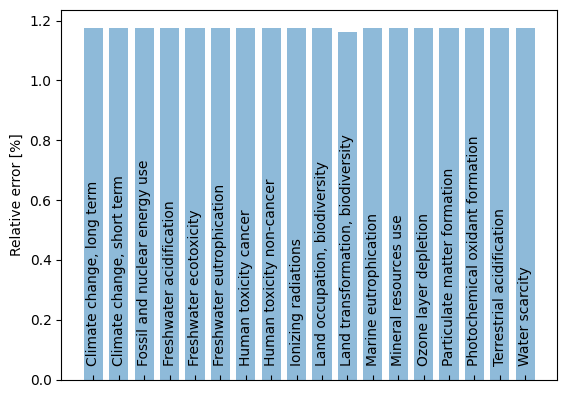

In [72]:
plot_comparison(comparison_wind_midpoints, save=False)

### Endpoints

In [42]:
comparison_wind_endpoints = comparison(tech="WIND", conversion_factor=0.000001, capacity_factor=0.002, use_value=1e6, indicator="endpoint", df_bw_mid=wind_midpoints_bw, df_bw_end=wind_endpoints_bw, R_constr=R_long_tot_constr, R_use=R_long_tot_use, no_use_phase=False)
display(comparison_wind_endpoints)

,es_moo,brightway,rel_error
"Climate change, human health, long term",3.169014,3.132161,0.011766
"Climate change, human health, short term",1.005146,0.993457,0.011766
"Human toxicity cancer, long term",0.020813,0.020571,0.011764
"Human toxicity cancer, short term",3.345437,3.306525,0.011768
"Human toxicity non-cancer, long term",0.653070,0.645476,0.011764
"Human toxicity non-cancer, short term",0.435302,0.430242,0.011760
"Ionizing radiation, human health",0.001902,0.001880,0.011766
Ozone layer depletion,0.000224,0.000222,0.011765
Particulate matter formation,0.943570,0.932597,0.011766
Photochemical oxidant formation,0.000219,0.000216,0.011765


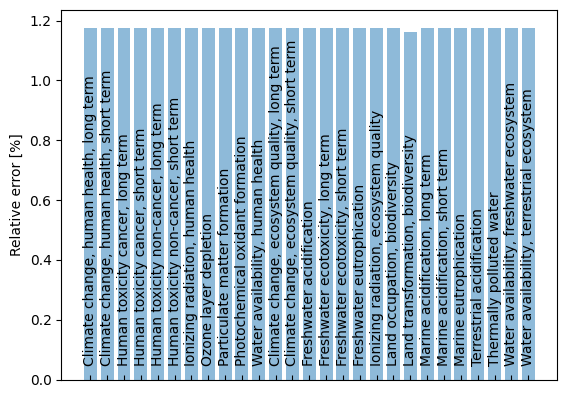

In [43]:
plot_comparison(comparison_wind_endpoints, save=False)

### AoP

In [73]:
comparison_wind_aop = comparison(tech="WIND", conversion_factor=0.000001, capacity_factor=0.002, use_value=1e6, indicator="aop", df_bw_mid=wind_midpoints_bw, df_bw_end=wind_endpoints_bw, R_constr=R_long_tot_constr, R_use=R_long_tot_use, no_use_phase=False)
display(comparison_wind_aop)

,es_moo,brightway,rel_error
Human health,1.104921e+01,1.092072e+01,0.011766
Ecosystem quality,1.602614e+06,1.583996e+06,0.011754


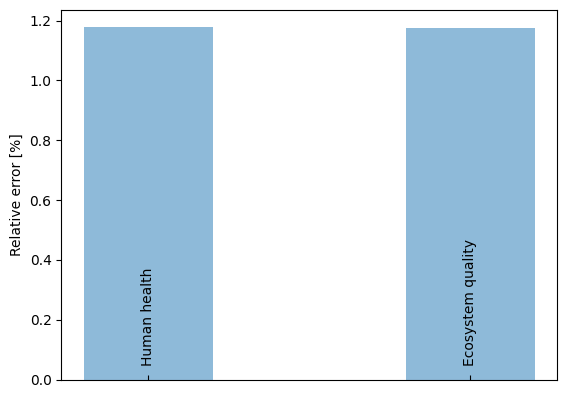

In [74]:
plot_comparison(comparison_wind_aop, save=False)

## NEW_HYDRO_DAM

Hydro dams ES unit are [GW] for construction and [GWh] for use. In ecoinvent, construction is on [kW]. Capacity factor: 0.8

In [15]:
name = "NEW_HYDRO_DAM"
display(R_long_tot_use[R_long_tot_use.ES_name == name])
display(R_long_tot_constr[R_long_tot_constr.ES_name == name])

,Impact category,CF unit,tech_id,value,ES_name,ES_region
4770,"Climate change, ecosystem quality, long term",PDF.m2.yr,8nui9qu6-1b0z-px93-lmr3-fzooeg106mot_jkjf85ej-...,3.025223e-11,NEW_HYDRO_DAM,RoW
4771,"Climate change, ecosystem quality, short term",PDF.m2.yr,8nui9qu6-1b0z-px93-lmr3-fzooeg106mot_jkjf85ej-...,9.375091e-11,NEW_HYDRO_DAM,RoW
4772,"Climate change, human health, long term",DALY,8nui9qu6-1b0z-px93-lmr3-fzooeg106mot_jkjf85ej-...,1.325867e-16,NEW_HYDRO_DAM,RoW
4773,"Climate change, human health, short term",DALY,8nui9qu6-1b0z-px93-lmr3-fzooeg106mot_jkjf85ej-...,4.343345e-16,NEW_HYDRO_DAM,RoW
4774,"Climate change, long term",kg CO2 eq (long),8nui9qu6-1b0z-px93-lmr3-fzooeg106mot_jkjf85ej-...,2.074859e-10,NEW_HYDRO_DAM,RoW
4775,"Climate change, short term",kg CO2 eq (short),8nui9qu6-1b0z-px93-lmr3-fzooeg106mot_jkjf85ej-...,5.311585e-10,NEW_HYDRO_DAM,RoW
4776,Fossil and nuclear energy use,MJ deprived,8nui9qu6-1b0z-px93-lmr3-fzooeg106mot_jkjf85ej-...,3.790973e-06,NEW_HYDRO_DAM,RoW
4777,Freshwater acidification,PDF.m2.yr,8nui9qu6-1b0z-px93-lmr3-fzooeg106mot_jkjf85ej-...,2.158824e-13,NEW_HYDRO_DAM,RoW
4778,Freshwater acidification,kg SO2 eq,8nui9qu6-1b0z-px93-lmr3-fzooeg106mot_jkjf85ej-...,2.626927e-19,NEW_HYDRO_DAM,RoW
4779,Freshwater ecotoxicity,CTUe,8nui9qu6-1b0z-px93-lmr3-fzooeg106mot_jkjf85ej-...,3.641436e-09,NEW_HYDRO_DAM,RoW


,Impact category,CF unit,tech_id,value,ES_name,ES_region
4050,"Climate change, ecosystem quality, long term",PDF.m2.yr,a97e9a1d-a316-497a-9e6c-e595edfe99f7_bb6df298-...,1.596147e+10,NEW_HYDRO_DAM,RoW
4051,"Climate change, ecosystem quality, short term",PDF.m2.yr,a97e9a1d-a316-497a-9e6c-e595edfe99f7_bb6df298-...,4.801045e+09,NEW_HYDRO_DAM,RoW
4052,"Climate change, human health, long term",DALY,a97e9a1d-a316-497a-9e6c-e595edfe99f7_bb6df298-...,7.267269e+04,NEW_HYDRO_DAM,RoW
4053,"Climate change, human health, short term",DALY,a97e9a1d-a316-497a-9e6c-e595edfe99f7_bb6df298-...,2.218864e+04,NEW_HYDRO_DAM,RoW
4054,"Climate change, long term",kg CO2 eq (long),a97e9a1d-a316-497a-9e6c-e595edfe99f7_bb6df298-...,2.605187e+10,NEW_HYDRO_DAM,RoW
...,...,...,...,...,...,...
4135,Thermally polluted water,PDF.m2.yr,5719e12f-71ac-447d-a555-3aa8b1136dcf_0a67114d-...,9.935924e+06,NEW_HYDRO_DAM,RoW
4136,"Water availability, freshwater ecosystem",PDF.m2.yr,5719e12f-71ac-447d-a555-3aa8b1136dcf_0a67114d-...,8.450543e+04,NEW_HYDRO_DAM,RoW
4137,"Water availability, human health",DALY,5719e12f-71ac-447d-a555-3aa8b1136dcf_0a67114d-...,-2.763403e+07,NEW_HYDRO_DAM,RoW
4138,"Water availability, terrestrial ecosystem",PDF.m2.yr,5719e12f-71ac-447d-a555-3aa8b1136dcf_0a67114d-...,5.510823e+05,NEW_HYDRO_DAM,RoW


## BUS_EV

Ecoinvent units:
- construction: [/unit] (one electric bus)
- use : [/km] (for one person)

ES units:
- construction: [/Mp.km/h]
- use: [/Mp.km]

Capacity factor: 40 (construction) ???
Conversion factor: 2.19e-9 (use)

There is 1000 kWh of battery per bus (kWh --> kg ??) and one bus weights 100000 kg ??? (11000 kg in ecoinvent).

Use example:

In [16]:
name = "BUS_EV"
display(R_long_tot_use[R_long_tot_use.ES_name == name])
display(R_long_tot_constr[R_long_tot_constr.ES_name == name])

,Impact category,CF unit,tech_id,value,ES_name,ES_region
315,"Climate change, ecosystem quality, long term",PDF.m2.yr,ogkir195-vvus-8mpi-xwuk-bq69dbrf9o2m_0rjf3mym-...,3.312468e-10,BUS_EV,GLO
316,"Climate change, ecosystem quality, short term",PDF.m2.yr,ogkir195-vvus-8mpi-xwuk-bq69dbrf9o2m_0rjf3mym-...,1.039257e-10,BUS_EV,GLO
317,"Climate change, human health, long term",DALY,ogkir195-vvus-8mpi-xwuk-bq69dbrf9o2m_0rjf3mym-...,1.507917e-15,BUS_EV,GLO
318,"Climate change, human health, short term",DALY,ogkir195-vvus-8mpi-xwuk-bq69dbrf9o2m_0rjf3mym-...,4.803196e-16,BUS_EV,GLO
319,"Climate change, long term",kg CO2 eq (long),ogkir195-vvus-8mpi-xwuk-bq69dbrf9o2m_0rjf3mym-...,5.489405e-10,BUS_EV,GLO
320,"Climate change, short term",kg CO2 eq (short),ogkir195-vvus-8mpi-xwuk-bq69dbrf9o2m_0rjf3mym-...,5.872882e-10,BUS_EV,GLO
321,Fossil and nuclear energy use,MJ deprived,ogkir195-vvus-8mpi-xwuk-bq69dbrf9o2m_0rjf3mym-...,9.574822e-09,BUS_EV,GLO
322,Freshwater acidification,PDF.m2.yr,ogkir195-vvus-8mpi-xwuk-bq69dbrf9o2m_0rjf3mym-...,6.270698e-12,BUS_EV,GLO
323,Freshwater acidification,kg SO2 eq,ogkir195-vvus-8mpi-xwuk-bq69dbrf9o2m_0rjf3mym-...,7.620993e-18,BUS_EV,GLO
324,Freshwater ecotoxicity,CTUe,ogkir195-vvus-8mpi-xwuk-bq69dbrf9o2m_0rjf3mym-...,1.843368e-07,BUS_EV,GLO


,Impact category,CF unit,tech_id,value,ES_name,ES_region
6030,"Climate change, ecosystem quality, long term",PDF.m2.yr,l501ep42-iio2-lv5i-ksfb-36xdaluw8qwv_op9x5biy-...,3.466442e+03,BUS_EV,RoW
6031,"Climate change, ecosystem quality, short term",PDF.m2.yr,l501ep42-iio2-lv5i-ksfb-36xdaluw8qwv_op9x5biy-...,1.090100e+03,BUS_EV,RoW
6032,"Climate change, human health, long term",DALY,l501ep42-iio2-lv5i-ksfb-36xdaluw8qwv_op9x5biy-...,1.577987e-02,BUS_EV,RoW
6033,"Climate change, human health, short term",DALY,l501ep42-iio2-lv5i-ksfb-36xdaluw8qwv_op9x5biy-...,5.038028e-03,BUS_EV,RoW
6034,"Climate change, long term",kg CO2 eq (long),l501ep42-iio2-lv5i-ksfb-36xdaluw8qwv_op9x5biy-...,5.739137e+03,BUS_EV,RoW
6035,"Climate change, short term",kg CO2 eq (short),l501ep42-iio2-lv5i-ksfb-36xdaluw8qwv_op9x5biy-...,6.160183e+03,BUS_EV,RoW
6036,Fossil and nuclear energy use,MJ deprived,l501ep42-iio2-lv5i-ksfb-36xdaluw8qwv_op9x5biy-...,9.534047e+04,BUS_EV,RoW
6037,Freshwater acidification,PDF.m2.yr,l501ep42-iio2-lv5i-ksfb-36xdaluw8qwv_op9x5biy-...,6.534889e+01,BUS_EV,RoW
6038,Freshwater acidification,kg SO2 eq,l501ep42-iio2-lv5i-ksfb-36xdaluw8qwv_op9x5biy-...,7.956094e-05,BUS_EV,RoW
6039,Freshwater ecotoxicity,CTUe,l501ep42-iio2-lv5i-ksfb-36xdaluw8qwv_op9x5biy-...,2.053611e+06,BUS_EV,RoW


## CEMENT_PROD